In [3]:
#CVAE
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/home/pt/test1/data/mnist", one_hot=True)
# Parameters
learning_rate = 0.001
num_steps =80000
batch_size = 64
y_dim=10
# Network Parameters
image_dim = 784 # MNIST images are 28x28 pixels
hidden_dim = 512
latent_dim = 2

# A custom initialization (see Xavier Glorot init)
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

# Variables
weights = {
    'encoder_h1': tf.Variable(glorot_init([image_dim+y_dim, hidden_dim])),
    'z_mean': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'z_std': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'decoder_h1': tf.Variable(glorot_init([latent_dim+y_dim, hidden_dim])),
    'decoder_out': tf.Variable(glorot_init([hidden_dim, image_dim]))
}
biases = {
    'encoder_b1': tf.Variable(glorot_init([hidden_dim])),
    'z_mean': tf.Variable(glorot_init([latent_dim])),
    'z_std': tf.Variable(glorot_init([latent_dim])),
    'decoder_b1': tf.Variable(glorot_init([hidden_dim])),
    'decoder_out': tf.Variable(glorot_init([image_dim]))
}

# Building the encoder
input_image = tf.placeholder(tf.float32, shape=[None, image_dim])
noise_VAE=tf.placeholder(tf.float32, shape=[None, image_dim])

y = tf.placeholder(tf.float32, shape=[None, y_dim])

encoder = tf.matmul(tf.concat([input_image,y], 1), weights['encoder_h1']) + biases['encoder_b1']
encoder = tf.nn.tanh(encoder)
z_mean = tf.matmul(encoder, weights['z_mean']) + biases['z_mean']
z_std = tf.matmul(encoder, weights['z_std']) + biases['z_std']

# Sampler: Normal (gaussian) random distribution
eps = tf.random_normal(tf.shape(z_std), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')
z = z_mean + tf.exp(z_std / 2) * eps

# Building the decoder (with scope to re-use these layers later)
decoder = tf.matmul(tf.concat([z,y], 1), weights['decoder_h1']) + biases['decoder_b1']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_out']) + biases['decoder_out']
decoder = tf.nn.sigmoid(decoder)

# Define VAE Loss
def vae_loss(x_reconstructed, x_true):
    # Reconstruction loss
    encode_decode_loss = x_true * tf.log(1e-10 + x_reconstructed) \
                         + (1 - x_true) * tf.log(1e-10 + 1 - x_reconstructed)
    encode_decode_loss = -tf.reduce_sum(encode_decode_loss, 1)
    # KL Divergence loss
    kl_div_loss = 1 + z_std - tf.square(z_mean) - tf.exp(z_std)
    kl_div_loss = -0.5 * tf.reduce_sum(kl_div_loss, 1)
    return tf.reduce_mean(encode_decode_loss + kl_div_loss)

loss_op = vae_loss(decoder, input_image)
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Initialize the variables (i.e. assign their default value)
#init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
#sess = tf.Session()

# Run the initializer
#sess.run(init)
sess = tf.Session()
saver = tf.train.Saver() 
sess.run(tf.global_variables_initializer())
#saver.restore(sess, "/home/pt/test1/omnist2/Utils/good-x1x2/drawmodel.ckpt")
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    #batch_x, _ = mnist.train.next_batch(batch_size)
    #yin=np.zeros((batch_size,y_dim))
    # Train
    
    #x_train1,_,x_train2,_=getbatchtraintest(64)
    #x_train1,x_train2=getbatchtraintest(64)
    #X_mb,y_mb= mnist.train.next_batch(64)
    
    #noiseG1_in=np.random.uniform(-0.2, 0.2, size=[300, 784])
    #y_sample[:, 2] = 1
    
    x_train2,y_train2= mnist.test.next_batch(64)

    #Z_sample = sample_Z(64, Z_dim1)
    #samples = sess.run(G_sample, feed_dict={Z: Z_sample, y1:y_train2})
    feed_dict = {input_image: x_train2,y:y_train2}
    _, l = sess.run([train_op, loss_op], feed_dict=feed_dict)
    
        
  
    if i % 1000 == 0 or i == 1:
        print('Step %i, Loss: %f' % (i, l))
        


#sess = tf.Session()
#saver = tf.train.Saver() 
#sess.run(tf.global_variables_initializer())
#saver.restore(sess, "/home/pt/test1/omnist2/Utils/good-x1x2-2/drawmodel.ckpt")



Extracting /home/pt/test1/data/mnist/train-images-idx3-ubyte.gz
Extracting /home/pt/test1/data/mnist/train-labels-idx1-ubyte.gz
Extracting /home/pt/test1/data/mnist/t10k-images-idx3-ubyte.gz
Extracting /home/pt/test1/data/mnist/t10k-labels-idx1-ubyte.gz
Step 1, Loss: 602.146362
Step 1000, Loss: 148.593872
Step 2000, Loss: 140.315903
Step 3000, Loss: 136.229736
Step 4000, Loss: 135.853180
Step 5000, Loss: 133.222809
Step 6000, Loss: 133.922821
Step 7000, Loss: 139.070282
Step 8000, Loss: 142.628113
Step 9000, Loss: 132.345413
Step 10000, Loss: 137.503098
Step 11000, Loss: 136.147766
Step 12000, Loss: 130.195602
Step 13000, Loss: 130.503937
Step 14000, Loss: 122.544159
Step 15000, Loss: 133.636597
Step 16000, Loss: 133.975677
Step 17000, Loss: 127.124222
Step 18000, Loss: 129.726440
Step 19000, Loss: 134.960907
Step 20000, Loss: 113.036453
Step 21000, Loss: 124.840500
Step 22000, Loss: 125.212776
Step 23000, Loss: 122.666580
Step 24000, Loss: 123.857719
Step 25000, Loss: 121.310059
Step 

KeyboardInterrupt: 

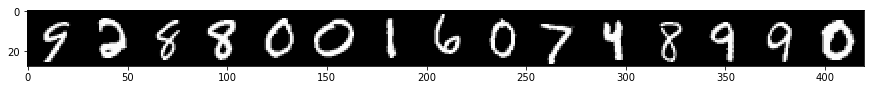

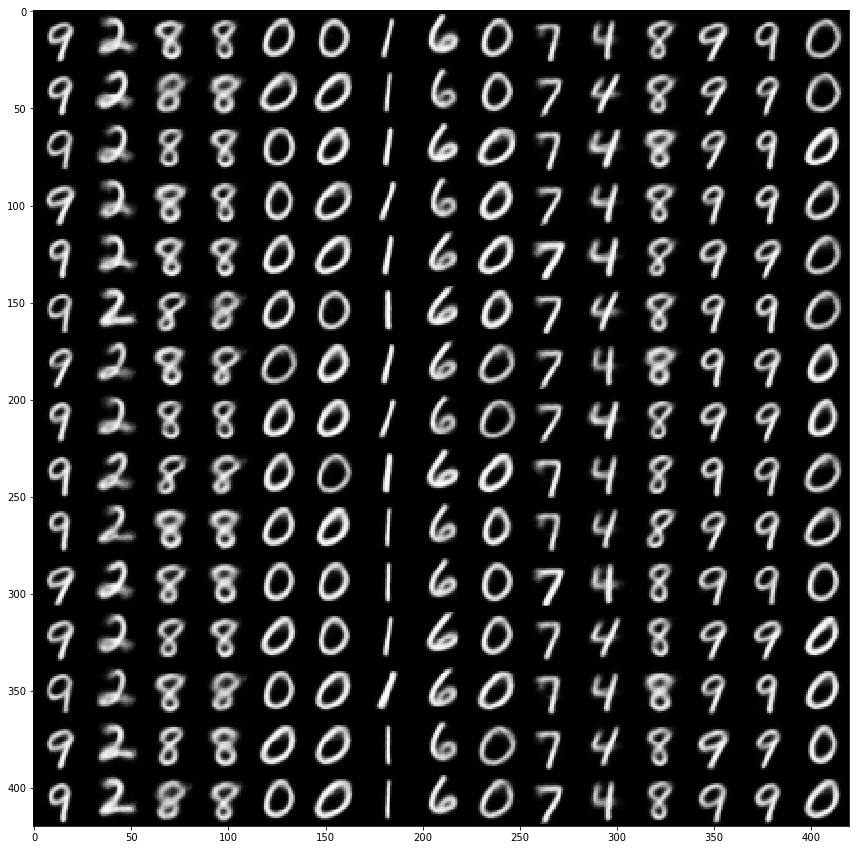

In [4]:

# Testing
# Generate images from noise, using the generator network.

noise_input = tf.placeholder(tf.float32, shape=[None, latent_dim])
#y = tf.placeholder(tf.float32, shape=[None, y_dim])
# Rebuild the decoder to create image from noise
decoder = tf.matmul(tf.concat([noise_input,y], 1), weights['decoder_h1']) + biases['decoder_b1']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_out']) + biases['decoder_out']
decoder = tf.nn.sigmoid(decoder)
n = 15
noise_dim=2
#y1, y11= getbatchtrain(n)

X_mb,y_mb= mnist.test.next_batch(n)
#X_mb,y_mb=getbatchtrain(n)
#y_sample[:, 2] = 1
#samples = sess.run(G_sample, feed_dict={Z: Z_sample, y1:y_mb})

#yt=samples
#y1=net1.predict(y11)
canvas_orig = np.empty((28 * 1, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))

for i in range(1):
    # MNIST test set8
  
    #g=np.dot(batch_x, np.transpose(net.beta)) 
    #g=np.dot(net2input,net.beta)
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = X_mb[j].reshape([28, 28])
        
for i in range(n):
    # Noise input.
    z = np.random.uniform(-1., 1., size=[n, noise_dim])
    
    #y1[:,9]=1
    # Generate image from noise.
    #decoder = np.dot(z, net4.beta) 
    #decoder= np.dot(decoder, net3.beta) 
    #decoder= np.dot(decoder, net2.beta) 
    g = sess.run(decoder, feed_dict={noise_input: z,y:y_mb})
    #g = net2.predict(z)
    #g= np.dot(z, net.beta) 
    # Rescale values to the original [0, 1] (from tanh -> [-1, 1])
    
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])
        
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()